In [189]:
# Importing Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [190]:
# Loading dataset
dataset = pd.read_csv('C:/Users/Anu/Dropbox/Rutgers Second Sem/Machine Learning/flowers.csv')


In [191]:
# Analyzing Dataset attribures
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())
print(dataset.groupby('species').size())
dataset['sepal length']=dataset['sepal length'].astype('float')
dataset['sepal width']=dataset['sepal width'].astype('float')
dataset['petal length']=dataset['petal length'].astype('float')
dataset['petal width']=dataset['petal width'].astype('float')
print(dataset.head())


(150, 5)
   sepal length  sepal width  petal length  petal width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
dtype: i

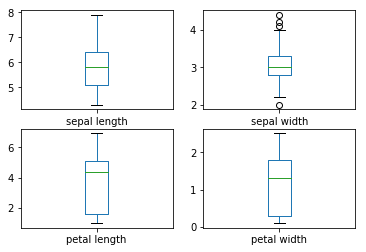

In [192]:
# Data visualization
#BoxPlots
dataset.plot(kind='box',subplots=True, layout=(2,2))
plt.show()

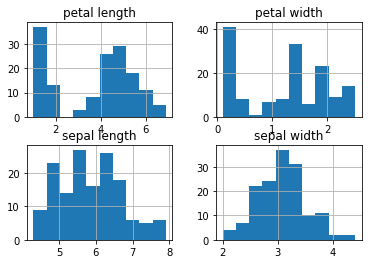

In [193]:
#Histogram
dataset.hist()
plt.show()

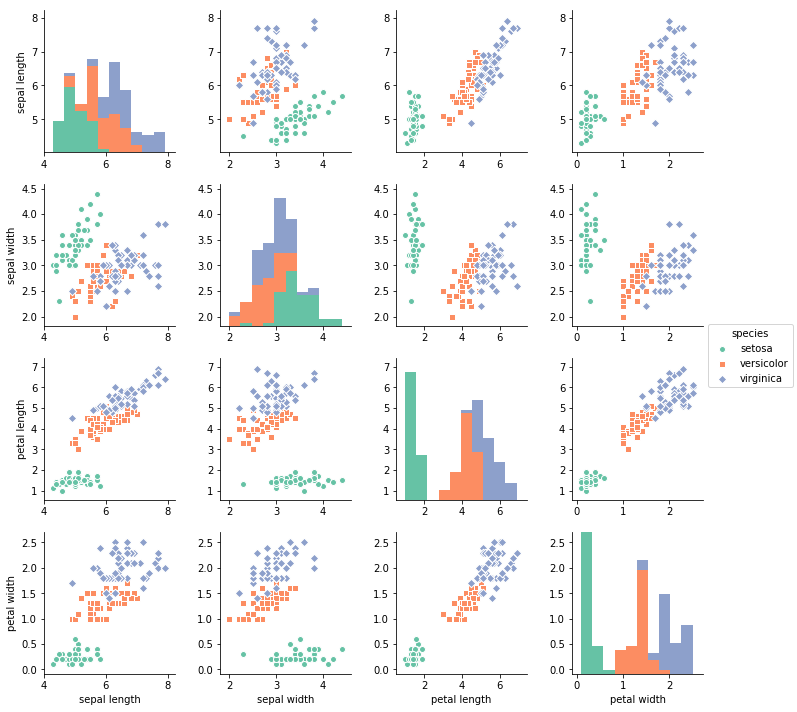

In [194]:
# Scatter Plot Matrix
#scatter_matrix(dataset, color="Green")
#sns.pairplot(dataset, kind="scatter")
#plt.show()

sns.pairplot(dataset, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()


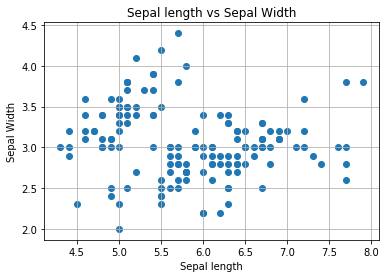

In [195]:
# Scatter plot sepal length and sepal width
plt.scatter(dataset['sepal length'], dataset['sepal width'])
plt.title("Sepal length vs Sepal Width")
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

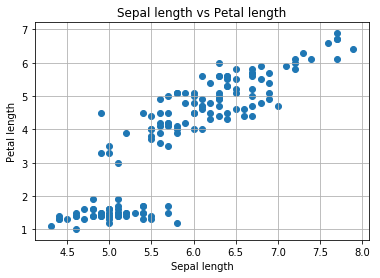

In [196]:
# Scatter plot sepal length and petal length
plt.scatter(dataset['sepal length'], dataset['petal length'])
plt.title("Sepal length vs Petal length")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

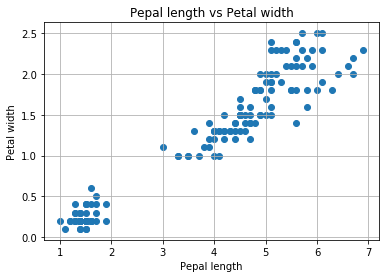

In [197]:
# Scatter plot Petal length and Petal Width
plt.scatter(dataset['petal length'], dataset['petal width'])
plt.title("Pepal length vs Petal width")
plt.xlabel("Pepal length")
plt.ylabel("Petal width")
plt.grid(True)
plt.show()

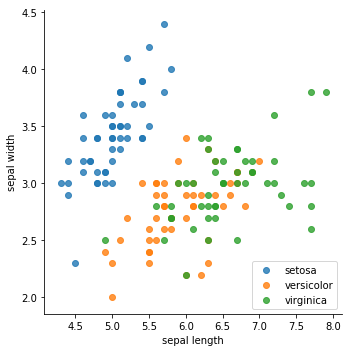

In [198]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal length", y="sepal width", data=dataset, fit_reg=False, hue='species', 
           legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()


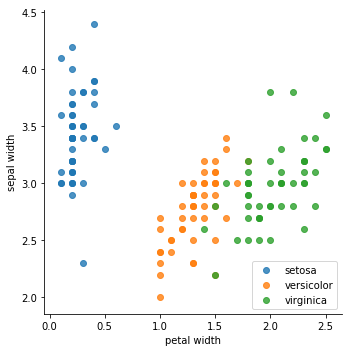

In [226]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="petal width", y="sepal width", data=dataset, fit_reg=False, 
           hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()

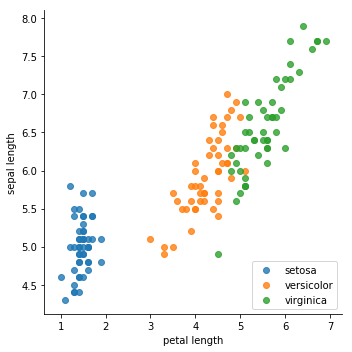

In [200]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="petal length", y="sepal length", data=dataset, fit_reg=False, 
           hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()

In [248]:
# Splitting the dataset
array= dataset.values

In [202]:
x = array[:,0:4]
Y = array[:,4]
validation_size=0.20
seed=7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, Y, test_size=validation_size, random_state=seed)

In [203]:
# Building models
seed = 7
scoring = 'accuracy'
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LDA: 0.975000 (0.038188)
NB: 0.975000 (0.053359)


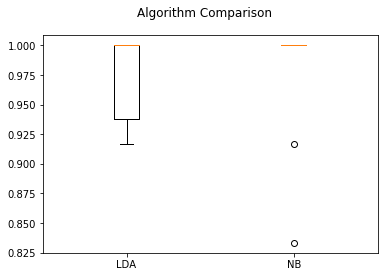

In [204]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [205]:
# Making predictions on validation dataset
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

#LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions1 = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions1))
print(confusion_matrix(Y_validation, predictions1))
print(classification_report(Y_validation, predictions1))


0.833333333333
[[7 0 0]
 [0 9 3]
 [0 2 9]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.82      0.75      0.78        12
  virginica       0.75      0.82      0.78        11

avg / total       0.84      0.83      0.83        30

0.966666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       1.00      0.92      0.96        12
  virginica       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



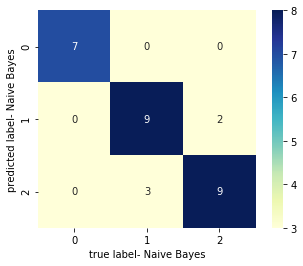

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_validation, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- Naive Bayes')
plt.ylabel('predicted label- Naive Bayes')
plt.show()

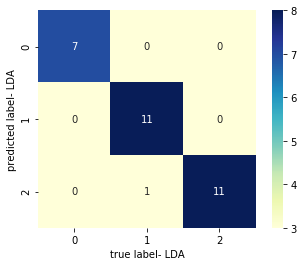

In [207]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_validation, predictions1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- LDA')
plt.ylabel('predicted label- LDA')
plt.show()

# Conclusion- 
Linear discriminant analysis performs better than naive bayes. The accuracy for LDA is 97% while for naive bayes it is 83%. 

## K means Clustering

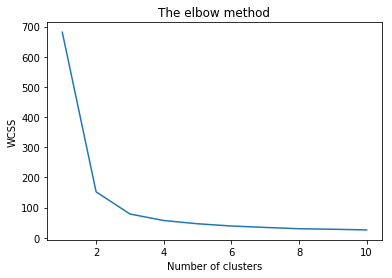

In [208]:
#Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

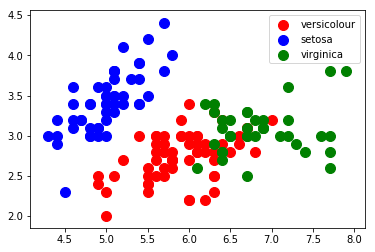

In [252]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')
plt.legend()
plt.show()

In [253]:
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

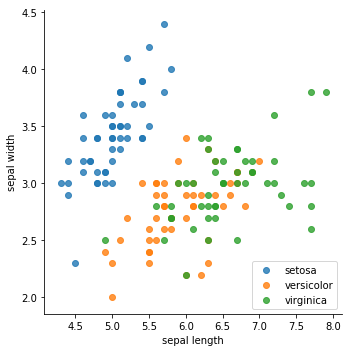

In [224]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal length", y="sepal width", data=dataset, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

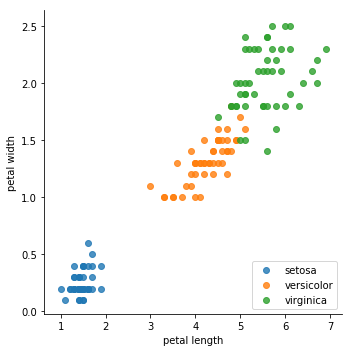

In [227]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="petal length", y="petal width", data=dataset, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()
